# Imagenes satelitales
## GLM y Canal 14 GOES
_Mario Guerra, Octubre 2023_

**NOTA: SI SE VA A CORRER ESTE CÓDIGO, UTILIZAR EL ENTORNO satpy-test.yml**

Aparte de la detección de radiancia de radiación electromagnética en diferentes longitudes de onda utilizado para la creación de imágenes con resoluciones estpaciales de 0.5 a 2 km GOES-16 posee el sensor [Geostationary Lighning Mapper (GLM)](https://www.star.nesdis.noaa.gov/goes/documents/GLM_Quick_Guides_May_2019.pdf), el cual, a través de la detección de cambios en brillo de radiación cerca al infrarojo asociado a actividad eléctrica en la atmósfera puede detectar ocurrencias de destellos y rayos con su ubicación y tiempo de detección. En este notebook se describirá como se puede descargar información de este detector junto a una imagen satelital en infrarojo para crear un producto de actividad eléctrica sobre el territorio nacional guatemalteco.

Los NetCDF4 asociados al sensor GLM poseen diferentes datos y metadatos asociados a tres tipos de variable fundamentales a la operación de este sensor: eventos (events), grupos (groups) y destellos (flashes). A groso modo estos datos están ordenados en una jerarquía en donde un evento es una ocurrencia de un pixel exediando un umbral de detección por mas de 2 ms, un grupo es un conjunto de 2 o más eventos simultaneos y un destello es 2 o más eventos sequenciales separados por menos de 300 ms y 16.5 km.  

A diferencia de los datos ABI-L1b-RadF (facilmente manejados por satpy), los datos GLM-L2-LCFA se deben manejar con el paquete xarray directamente. Los  datos de GLM tienen una frecuencia de 20 segundos. Es por eso que descargar los datos de los últimos 40 minutos implica una gran cantidad de archivos individuales para luego ser compilados en un solo objero de pandas.

In [1]:
# En este ejemplo se utilizara en el entorno satpy-test.yml, por ende se recomienda correr las celdas de códico con el kernel correcto
import GOES as JOAOGOES # le cambio nombre al paquete dentro del código para evitar confuciones con el paquete goes2go, utilizado en otros productos
import datetime as dt # para obtener el tiempo actual y a base de eso obtener las datos más recientes

# import time

#time.sleep(90) # en la versión real de este script se deja esperar un poco de tiempo ya que cron es ejectutado exactamente a */10 * * * * UTC, cuando los productos todavía no existen
timenow = dt.datetime.now(dt.timezone.utc) # tiempo al momento de ejecutar código
#chnls = ['02'] # se puede modificar el código para descargar más canales añadiendo a esta lista, por ejemplo ['C02','C13','C08']
path_GLM_nc = './GLM-L2-LCFA/'
timefinalstr =  (timenow - dt.timedelta(minutes=1)).strftime('%Y%m%d-%H%M%S') # 
timeinitstr = (timenow - dt.timedelta(minutes=41)).strftime('%Y%m%d-%H%M%S') # 

print("Decargando datos de", timeinitstr,"a", timefinalstr)

flist = JOAOGOES.download('goes16', 'GLM-L2-LCFA',
              DateTimeIni = timeinitstr, DateTimeFin = timefinalstr,
              path_out=path_GLM_nc)
    

2023-10-18 15:21:16.163087+00:00 2023-10-18 13:22:16.163087+00:00
Files:
  OR_GLM-L2-LCFA_G16_s20232911441200_e20232911441400_c20232911441420.nc 100% 0.2MB 0s
  OR_GLM-L2-LCFA_G16_s20232911441400_e20232911442000_c20232911442019.nc 100% 0.3MB 0s
  OR_GLM-L2-LCFA_G16_s20232911442000_e20232911442200_c20232911442219.nc 100% 0.3MB 0s
  OR_GLM-L2-LCFA_G16_s20232911442200_e20232911442400_c20232911442417.nc 100% 0.3MB 0s
  OR_GLM-L2-LCFA_G16_s20232911442400_e20232911443000_c20232911443019.nc 100% 0.3MB 0s
  OR_GLM-L2-LCFA_G16_s20232911443000_e20232911443200_c20232911443218.nc 100% 0.3MB 0s
  OR_GLM-L2-LCFA_G16_s20232911443200_e20232911443400_c20232911443416.nc 100% 0.2MB 0s
  OR_GLM-L2-LCFA_G16_s20232911443400_e20232911444000_c20232911444018.nc 100% 0.3MB 0s
  OR_GLM-L2-LCFA_G16_s20232911444000_e20232911444200_c20232911444217.nc 100% 0.3MB 0s
  OR_GLM-L2-LCFA_G16_s20232911444200_e20232911444400_c20232911444416.nc 100% 0.3MB 0s
  OR_GLM-L2-LCFA_G16_s20232911444400_e20232911445000_c2023291144501

Los datos de los archivos descargados se pueden procesar como objetos xarray (un estido de base de datos multidimencional) que posee información de instancias de eventos, grupos y destellos.

In [2]:
import xarray as xr
ds_example = xr.open_dataset(flist[0])
ds_example

<xarray.Dataset>
Dimensions:                                 (number_of_events: 3837,
                                             number_of_groups: 1517,
                                             number_of_flashes: 122,
                                             number_of_time_bounds: 2,
                                             number_of_wavelength_bounds: 2,
                                             number_of_field_of_view_bounds: 2)
Coordinates: (12/21)
    event_id                                (number_of_events) uint32 ...
    event_time_offset                       (number_of_events) datetime64[ns] ...
    event_lat                               (number_of_events) float32 ...
    event_lon                               (number_of_events) float32 ...
    event_parent_group_id                   (number_of_events) uint32 ...
    group_id                                (number_of_groups) uint32 ...
    ...                                      ...
    product_time                            datetime64[ns] ...
    lightning_wavelength                    float32 ...
    group_time_threshold                    float32 ...
    flash_time_threshold                    float32 ...
    lat_field_of_view                       float32 ...
    lon_field_of_view                       float32 ...
Dimensions without coordinates: number_of_events, number_of_groups,
                                number_of_flashes, number_of_time_bounds,
                                number_of_wavelength_bounds,
                                number_of_field_of_view_bounds
Data variables: (12/27)
    event_energy                            (number_of_events) float32 ...
    group_frame_time_offset                 (number_of_groups) datetime64[ns] ...
    group_area                              (number_of_groups) float32 ...
    group_energy                            (number_of_groups) float32 ...
    group_quality_flag                      (number_of_groups) float32 ...
    flash_frame_time_offset_of_first_event  (number_of_flashes) datetime64[ns] ...
    ...                                      ...
    nominal_satellite_subpoint_lon          float32 ...
    lon_field_of_view_bounds                (number_of_field_of_view_bounds) float32 ...
    percent_uncorrectable_L0_errors         float32 ...
    algorithm_dynamic_input_data_container  int32 ...
    processing_parm_version_container       int32 ...
    algorithm_product_version_container     int32 ...
Attributes: (12/29)
    production_site:           RBU
    featureType:               point
    dataset_name:              OR_GLM-L2-LCFA_G16_s20232911441200_e2023291144...
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    institution:               DOC/NOAA/NESDIS> U.S. Department of Commerce, ...
    ...                        ...
    time_coverage_start:       2023-10-18T14:41:20.0Z
    time_coverage_end:         2023-10-18T14:41:40.0Z
    production_data_source:    Realtime
    production_environment:    OE
    LUT_Filenames:             GLM_CALINR_AllFilters(FM1E_CDRL79RevK_DO_09_00...
    id:                        6af4df0a-6773-42d2-abe7-a55f41172701

Todas las variables que tengan la misma "dimención" (number_of_*) tendrán la misma cantidad de datos y correspondrán a diferentes instancias de eventos, grupos y destellos (flashes). En este caso se pueden extraer las latitudes, longitudes y tiempos de finalización de diferentes flashes como coordenadas del dataset y se pueden guardar en diferentes dataframes de pandas para luego ser compilado en un gran DataFrame llamado "df".

In [2]:

import pandas as pd

all_ds = [xr.open_dataset(file) for file in flist]

df_collection = {}
for file in range(len(flist)):
    tempdict = {
        'TIEMPO' :all_ds[file].coords['flash_time_offset_of_last_event'].values,
        'LAT' : all_ds[file].coords['flash_lat'].values,
        'LON' : all_ds[file].coords['flash_lon'].values,
        'OLD' : file
    }
    df_collection[f'{flist[file]}'] = pd.DataFrame(tempdict)
df = pd.concat(df_collection)


df[['TIEMPO','LAT','LON','OLD']].to_csv("GLM-L2-LCFA/flashes.csv", index=False)

df = pd.read_csv('./GLM-L2-LCFA/flashes.csv')
df['TIEMPO'] = pd.to_datetime(df['TIEMPO'])
df['TIEMPO_2'] = [ timenow - pd.to_datetime(x).tz_localize("UTC")  for x in df['TIEMPO'].values]
#print(df[df['TIEMPO_2'] <= pd.Timedelta(minutes=60)].sort_values(by='TIEMPO_2'))
df.to_csv("GLM-L2-LCFA/flashes.csv", index=False)
print(df)



                              TIEMPO        LAT         LON  OLD  \
0      2023-10-16 19:39:19.579233170 -10.057667  -74.322300    0   
1      2023-10-16 19:39:19.584573746  29.678690 -108.483220    0   
2      2023-10-16 19:39:19.616617680 -23.119299  -46.029675    0   
3      2023-10-16 19:39:19.624247075  -5.426658  -60.383522    0   
4      2023-10-16 19:39:19.647135735  -5.001928  -52.286736    0   
...                              ...        ...         ...  ...   
100871 2023-10-16 20:19:19.447628021  12.619122  -86.135240  119   
100872 2023-10-16 20:19:19.458309173  -0.905274  -50.934914  119   
100873 2023-10-16 20:19:19.472423553   4.237313  -76.619320  119   
100874 2023-10-16 20:19:19.497219085 -26.160934  -47.949253  119   
100875 2023-10-16 20:19:19.530025482  -7.058456  -52.989754  119   

                        TIEMPO_2  
0      0 days 00:40:44.356445830  
1      0 days 00:40:44.351105254  
2      0 days 00:40:44.319061320  
3      0 days 00:40:44.311431925  
4      0

Como este pruducto también tiene una imagen satelital de fondo se repite el proceso establecido en el primer notebook de esta carpeta.

In [3]:
import os

chnls = ['14'] # se puede modificar el código para descargar más canales añadiendo a esta lista, por ejemplo ['C02','C13','C08']
path_ABI_nc = './ABI-L1b-RadF/'

timeinitstr =  (timenow - dt.timedelta(minutes=20)).strftime('%Y%m%d-%H%M%S') # download span is based on scan start time so we take the one that started 10 minutes ago
timefinalstr = (timenow - dt.timedelta(minutes=5)).strftime('%Y%m%d-%H%M%S') # cause thats the most recent one, the other one is still being made

filelist = []
for ch in chnls:
   if not os.path.exists(path_ABI_nc +f"C{ch}"):
                os.makedirs(path_ABI_nc +f"C{ch}") # organize the NetCDFs in neat little folders
                                                   # cause we are organized neat little people
   flist = JOAOGOES.download('goes16', 'ABI-L1b-RadF', channel=[ch],
                           DateTimeIni = timeinitstr, DateTimeFin = timefinalstr, 
                           path_out= path_ABI_nc +f"C{ch}/")
   if flist:
    filelist.append(flist[0])
    

Files:
  OR_ABI-L1b-RadF-M6C14_G16_s20232892000203_e20232892009511_c20232892009571.nc 100% 26.0MB 4s
  OR_ABI-L1b-RadF-M6C14_G16_s20232892010203_e20232892019511_c20232892019564.nc 100% 25.9MB 5s


In [4]:
filelist

['./ABI-L1b-RadF/C14/OR_ABI-L1b-RadF-M6C14_G16_s20232892000203_e20232892009511_c20232892009571.nc']


libgomp: Invalid value for environment variable OMP_NUM_THREADS


Generated with C14 image showing: 2023-10-16 20:00:20


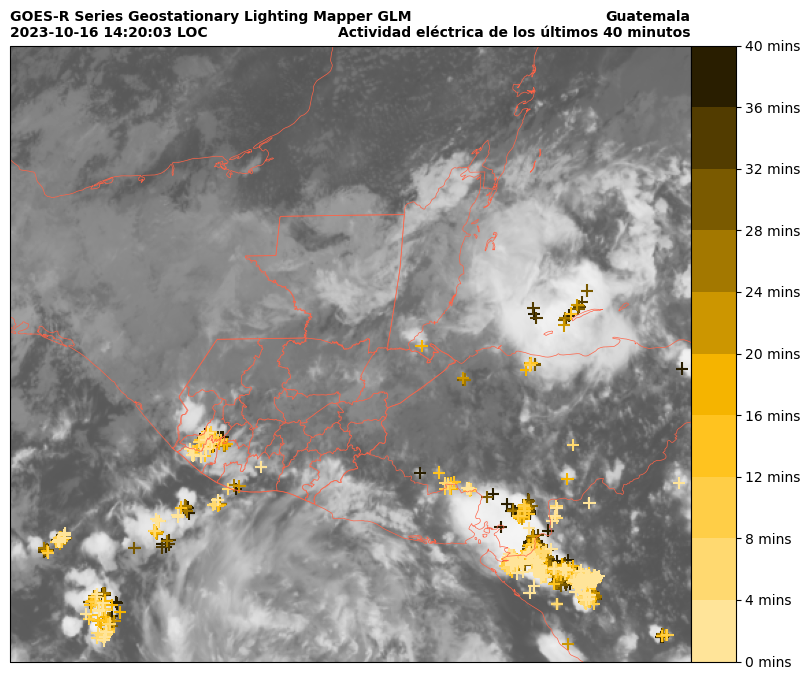

In [5]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

import numpy as np

from cartopy import crs as ccrs, feature as cfeature
import cartopy.io.shapereader as shpreader

from satpy import Scene

timeloc = timenow - dt.timedelta(hours=6)
timelocstr = timeloc.strftime("%Y-%m-%d %H:%M:%S")

# Departamentos guatemala IGN
fname = './shp/departamentos_gtm_new.shp'
depa_shapes = list(shpreader.Reader(fname).geometries())


#Colores y barra de color
gradient = ['#ffe499', '#ffd970', '#ffce47', "#ffc31f", '#f5b400', "#cc9600", '#a37800', "#7a5a00",'#523c00',"#291e00"]
cmap = mpl.colors.ListedColormap(gradient)
bounds = [0, 3*(50/60), 2*(3*(50/60)), 3*(3*(50/60)), 4*(3*(50/60)), 5*(3*(50/60)), 6*(3*(50/60)), 7*(3*(50/60)), 8*(3*(50/60)), 9*(3*(50/60)) , 10*(3*(50/60))]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

scnABI = Scene(filenames=filelist, reader='abi_l1b')
#scnABI = Scene(filesABI)

scnABI.load(['C14'])
var = scnABI['C14']
strs = var.attrs
abi_crs = var.area.to_cartopy_crs()

lonW = -94.36 
lonE = -85.2 
latS = 20.22 
latN = 11.60 

print('Generated with C14 image showing: ' + strs['start_time'].strftime('%Y-%m-%d %H:%M:%S'))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1, projection=abi_crs)

ax.set_title(f"GOES-R Series Geostationary Lighting Mapper GLM\n{timelocstr} LOC", fontweight='bold', fontsize=10,   loc='left')
ax.set_title(f"Guatemala\nActividad eléctrica de los últimos 40 minutos", fontweight='bold', fontsize=10, loc='right')

ax.add_geometries(depa_shapes, crs=ccrs.PlateCarree(), #ax is already projected, so we use the closest to an identity projection when adding things on top of it
                     edgecolor="tomato", facecolor='none', alpha=0.7, zorder=3, linewidth=0.5) 

ax.set_extent([lonW, lonE, latS, latN])

axpos = ax.get_position() #create new axes where the colorbar should go. it should be next
pos_x = axpos.x0+axpos.width #to the original axes and have the same height if implemented in the right order
pos_y = axpos.y0
cax_width = 0.045
cax_height = axpos.height
pos_cax = fig.add_axes([pos_x,pos_y,cax_width,cax_height])

ax.add_feature(cfeature.COASTLINE, edgecolor="tomato", linewidth=0.5)
ax.add_feature(cfeature.BORDERS, edgecolor="tomato", linewidth=0.5)

ir_img = ax.imshow(var, origin='upper', extent=(var.x[0], var.x[-1], var.y[-1], var.y[0]), cmap='Greys')

scatter = ax.scatter(x=df['LON'].values, y=df['LAT'].values,
            c=df['TIEMPO_2'].values,
            cmap=cmap,
            vmin = 0,
            vmax = 2.4e12,
            s=80,
            marker = "+",
            alpha = 1, #(i+1)/10
            transform=ccrs.PlateCarree())

cbar = plt.colorbar(scatter, 
                     cax=pos_cax, orientation='vertical', ticks=np.arange(0, 2.64e12,2.4e11)) # pd.TimeDeltas are floats of the amount of nanoseconds of a duration of time, so we use
cbar.set_ticklabels([f"{int((pd.Timedelta(x).seconds)/60)} mins" for x in np.arange(0, 2.64e12,2.4e11)]) # this fact to convert from ns -> mins and set the tick labels
